In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('WA_statewide_metrics_concise.csv')
df

,Unnamed: 0,schoolyear,OrganizationLevel,StudentGroupType,StudentGroup,Domain,Measure,MeasureValue,Numerator,Denominator,Percent,DevelopmentLevel,Suppress,DataAsOf
0,10845,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,NaN,506.0,6661.0,0.07596,NaN,NaN,NaN
1,11175,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,N,1377.0,6661.0,0.20673,NaN,NaN,NaN
2,11354,2011-12,State,All,All Students,Cognitive,CognitiveReadinessFlag,Y,4778.0,6661.0,0.71731,NaN,NaN,NaN
3,37984,2011-12,State,All,All Students,Literacy,LiteracyDevelopmentLevel,0-2 year olds,16.0,5902.0,0.00271,NaN,NaN,NaN
4,38010,2011-12,State,All,All Students,Literacy,LiteracyDevelopmentLevel,2-year olds,157.0,5902.0,0.02660,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2777,748771,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,orange,231.0,6740.0,0.03427,0-2 Year Olds,NaN,01/31/2024 01:05:15 PM
2778,748772,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,purple,3469.0,6740.0,0.51469,Kindergarten and Up,NaN,01/31/2024 01:05:15 PM
2779,748773,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalDevelopmentLevel,Yellow,236.0,6740.0,0.03501,2 Year Olds,NaN,01/31/2024 01:05:15 PM
2780,748774,2023-24,State,FederalRaceEthnicity,TwoorMoreRaces,SocialEmotional,SocialEmotionalReadinessFlag,N,1530.0,6748.0,0.22673,NaN,NaN,01/31/2024 01:05:15 PM


## EDA

In [3]:
## checking for null values

df.isnull().sum()

Unnamed: 0              0
schoolyear              0
OrganizationLevel       0
StudentGroupType        0
StudentGroup            0
Domain                  0
Measure                 0
MeasureValue          152
Numerator               0
Denominator             0
Percent                 0
DevelopmentLevel     1822
Suppress             2782
DataAsOf             1438
dtype: int64

In [4]:
df.describe()

,Unnamed: 0,Numerator,Denominator,Percent,Suppress
count,2782.000000,2782.000000,2782.000000,2782.000000,0.0
mean,580362.106758,4025.530194,14708.381021,0.270309,NaN
std,227666.694917,8730.091158,21564.969209,0.233108,NaN
min,10845.000000,1.000000,79.000000,0.001440,NaN
25%,395960.250000,175.000000,1024.000000,0.046830,NaN
50%,738868.500000,627.000000,5490.000000,0.233180,NaN
75%,748380.750000,3288.250000,18705.000000,0.418053,NaN
max,786597.000000,63688.000000,80627.000000,0.892670,NaN


In [5]:
## finding unique items for certain columns
unique_strings_per_column = {}

for column in df.columns:
    unique_strings_per_column[column] = df[column].unique()

print(unique_strings_per_column['StudentGroup'])
print(unique_strings_per_column['StudentGroupType'])
print(unique_strings_per_column['DevelopmentLevel'])

['All Students' 'American Indian/ Alaskan Native'
 'Black/ African American' 'Hispanic/ Latino of any race(s)' 'White'
 'Asian' 'Native Hawaiian/ Other Pacific Islander' 'TwoorMoreRaces']
['All' 'FederalRaceEthnicity']
[nan '4 Year Olds' '3 Year Olds' '0-2 Year Olds' 'Kindergarten and Up'
 '2 Year Olds']


In [6]:
## checking for percent vs student group 
df.groupby('StudentGroup')['Percent'].mean()

StudentGroup
All Students                               0.269663
American Indian/ Alaskan Native            0.269663
Asian                                      0.270423
Black/ African American                    0.270423
Hispanic/ Latino of any race(s)            0.269663
Native Hawaiian/ Other Pacific Islander    0.271605
TwoorMoreRaces                             0.271605
White                                      0.269663
Name: Percent, dtype: float64

### plots/correlations to look at data trends

<Axes: >

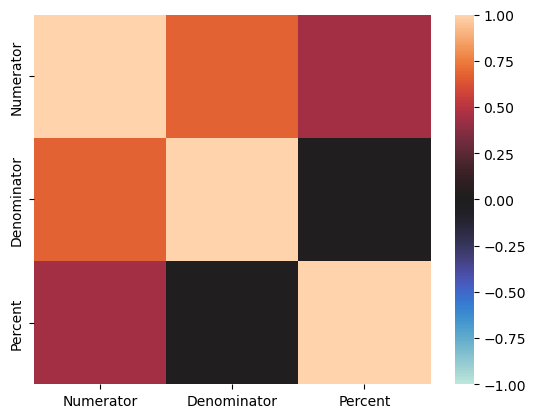

In [7]:
## correlation matrix between numeric columns in datset

numeric_columns = df.select_dtypes(include=['int64', 'float64']).drop(columns = {'Suppress', 'Unnamed: 0'})
sns.heatmap(numeric_columns.corr(), vmin = -1, vmax = 1, center = 0)

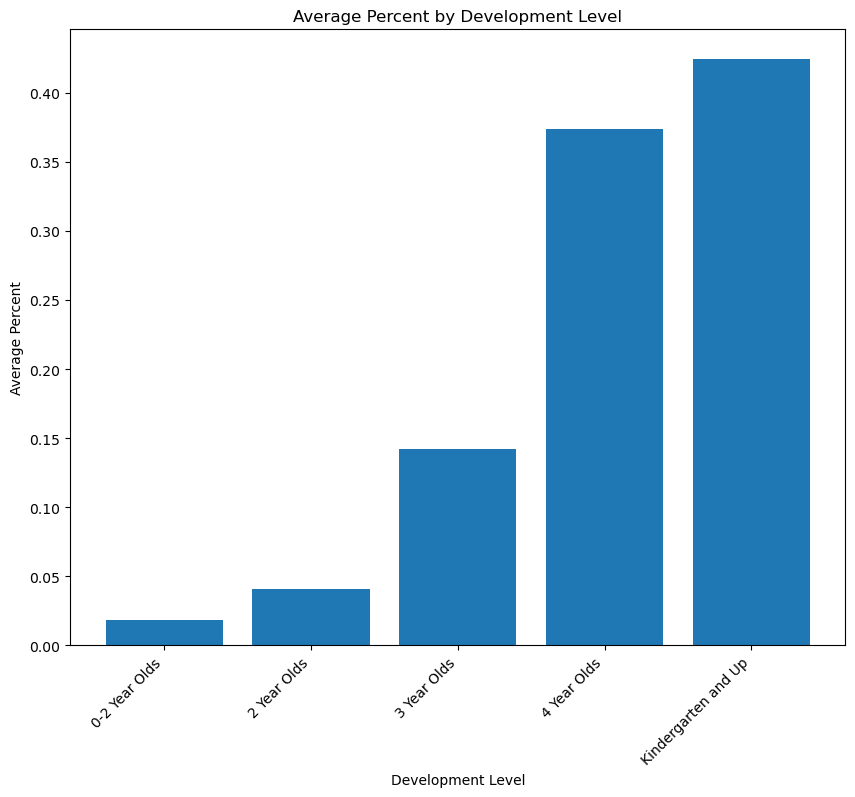

In [8]:
# development level vs percent
dev_type_percent = df.groupby('DevelopmentLevel')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 8))
plt.bar(dev_type_percent['DevelopmentLevel'], dev_type_percent['Percent'])
plt.xlabel('Development Level')
plt.ylabel('Average Percent')
plt.title('Average Percent by Development Level')
plt.xticks(rotation=45, ha='right')
plt.show()

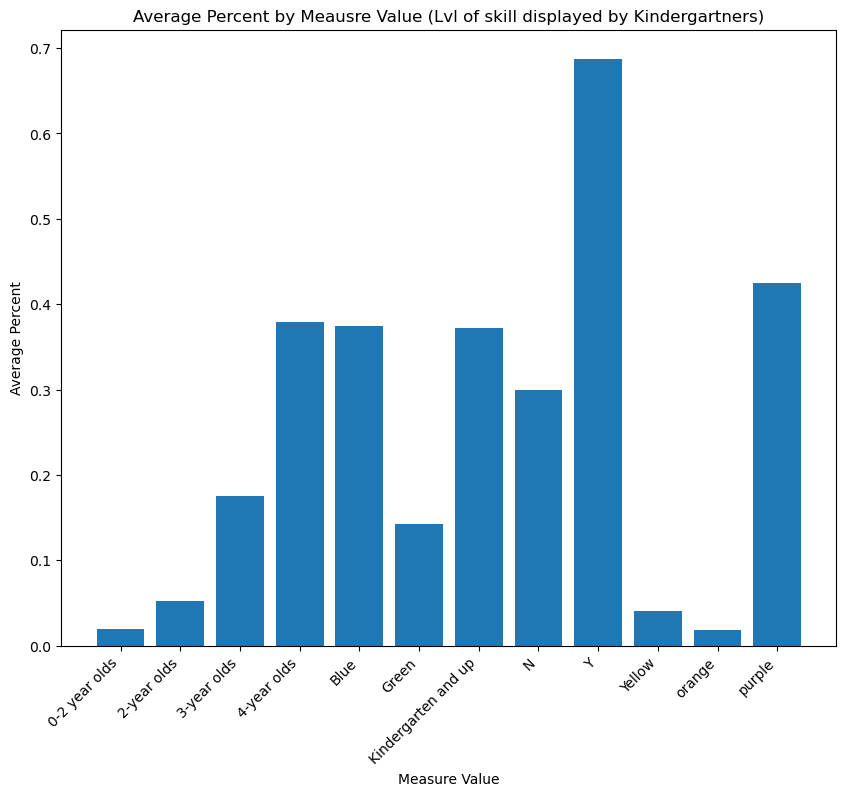

In [38]:
## measure value vs percent

group_percent = df.groupby('MeasureValue')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 8))
plt.bar(group_percent['MeasureValue'], group_percent['Percent'])
plt.xlabel('Measure Value')
plt.ylabel('Average Percent')
plt.title('Average Percent by Meausre Value (Lvl of skill displayed by Kindergartners)')
plt.xticks(rotation=45, ha='right')
plt.show()

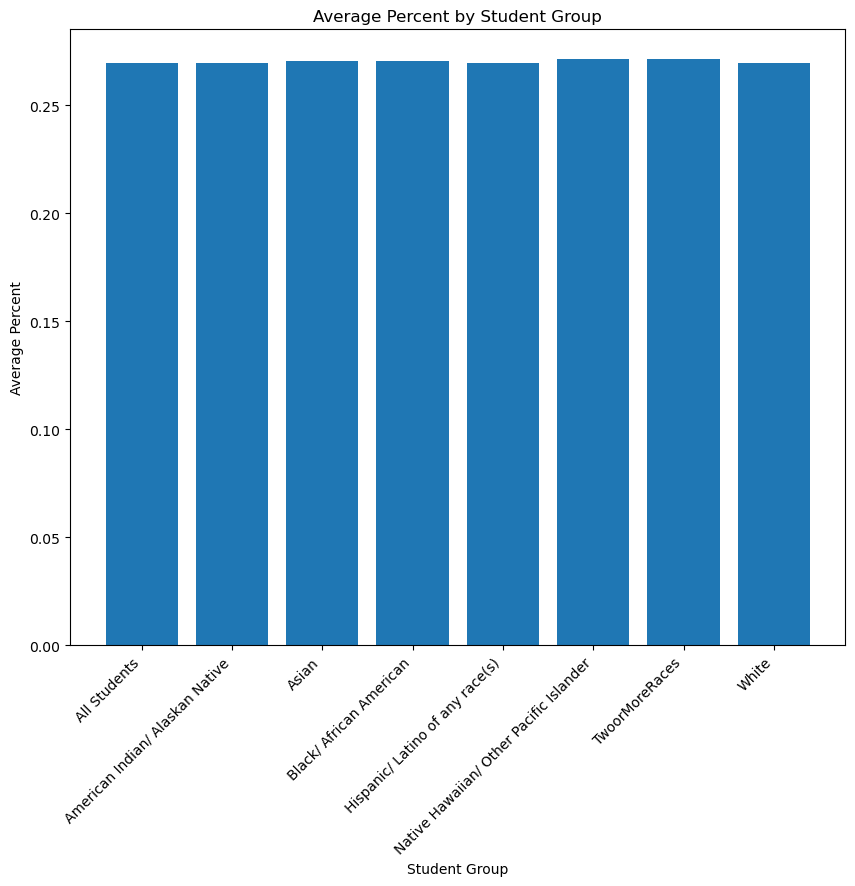

In [15]:
# student group vs percent
group_percent = df.groupby('StudentGroup')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 8))
plt.bar(group_percent['StudentGroup'], group_percent['Percent'])
plt.xlabel('Student Group')
plt.ylabel('Average Percent')
plt.title('Average Percent by Student Group')
plt.xticks(rotation=45, ha='right')
plt.show()


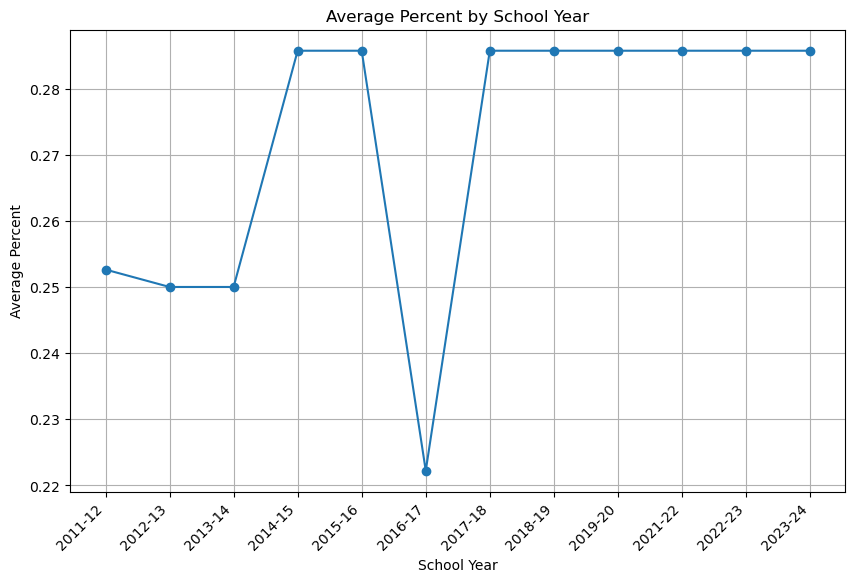

In [17]:
# school year vs percent
school_year_percent_calc = df.groupby('schoolyear')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(school_year_percent_calc['schoolyear'], school_year_percent_calc['Percent'], marker='o', linestyle='-')
plt.xlabel('School Year')
plt.ylabel('Average Percent')
plt.title('Average Percent by School Year')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

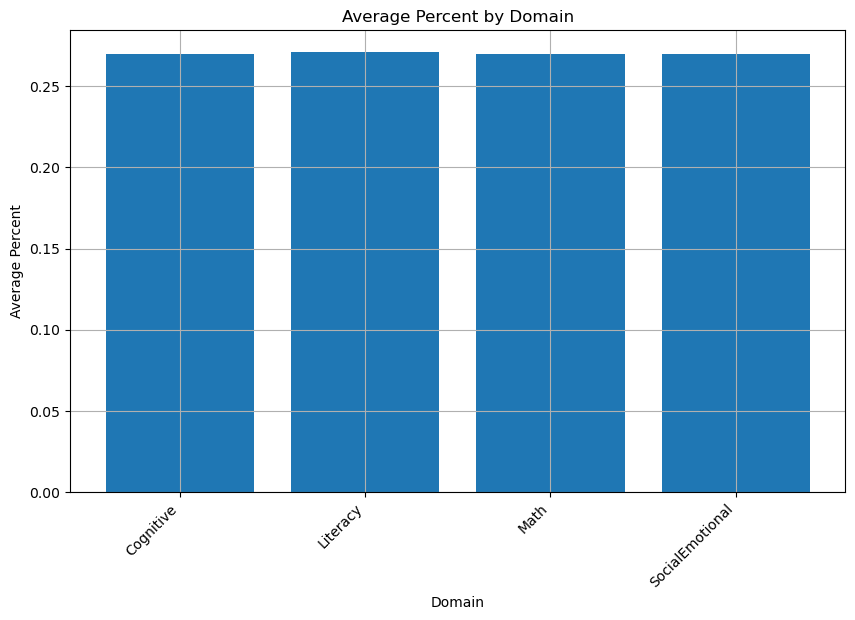

In [33]:
# domain vs percent
domain_percent_calc = df.groupby('Domain')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(domain_percent_calc['Domain'], domain_percent_calc['Percent'])
plt.xlabel('Domain')
plt.ylabel('Average Percent')
plt.title('Average Percent by Domain')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

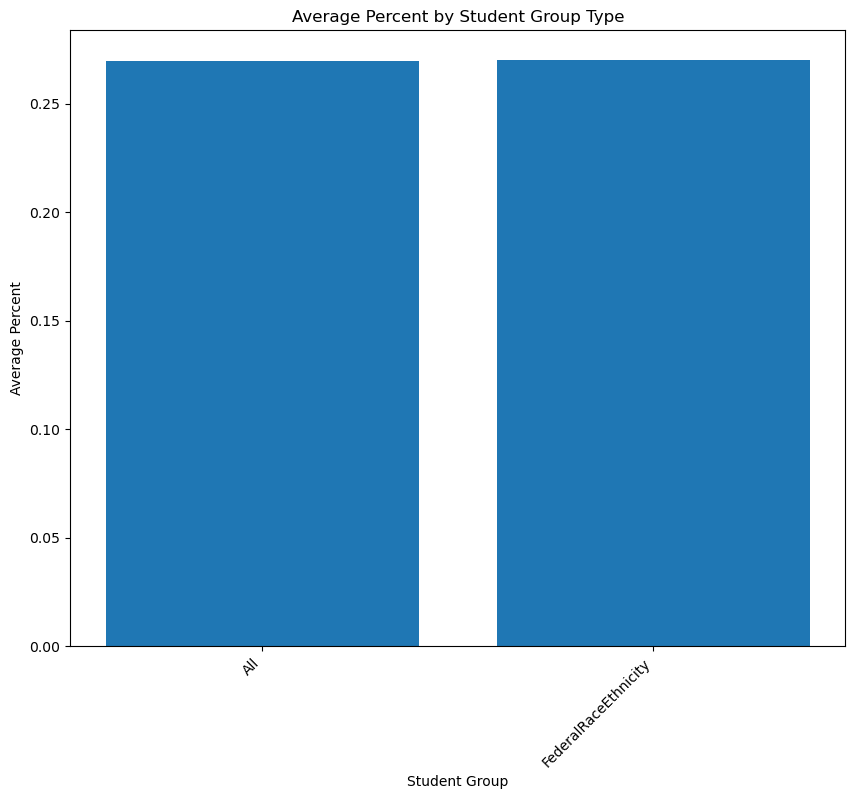

In [32]:
## group type vs percent

group_percent = df.groupby('StudentGroupType')['Percent'].mean().reset_index()

plt.figure(figsize=(10, 8))
plt.bar(group_percent['StudentGroupType'], group_percent['Percent'])
plt.xlabel('Student Group')
plt.ylabel('Average Percent')
plt.title('Average Percent by Student Group Type')
plt.xticks(rotation=45, ha='right')
plt.show()